In [1]:
from os.path import dirname, join as pjoin
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

mat_contents = sio.loadmat("data.mat")

The first 15 subjects are from Taylor et al 2014, the next 10 are the rotating condition from Bond et al 2015, next 10 are from fixed landmarks from bond et al 2015, next ten are Brudner et al 2016, and last ten are unpublished.

In [2]:
mat_contents

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Mon Nov 27 20:46:03 2017',
 '__version__': '1.0',
 '__globals__': [],
 'data': array([[(array([[0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0],
                ...,
                [0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0]], dtype=int16), array([[ 6.09821195, -2.85402497,  1.48145717, ..., -0.49821161,
                  1.23387217, -0.17849095],
                [ 1.88067824, -1.04162668,  1.03535319, ...,  7.52382044,
                 14.33280283,  1.94148639],
                [-0.51928288,  0.3472429 ,  0.6902772 , ..., -5.49232456,
                  2.45753815,  7.28595913],
                ...,
                [-2.5791475 ,  0.51616423, -3.97938245, ..., 14.71756657,
                 14.72548276, 21.42958369],
                [ 0.3430844 ,  2.08256528,  3.78056853, ..., 13.28018469,
             

In [3]:
rot = mat_contents["data"]["rotation"][0][0]
target_error = mat_contents["data"]["target_error"][0][0]
hand_angle = mat_contents["data"]["hand_angle"][0][0]
explicit = mat_contents["data"]["explicit"][0][0]
implicit = mat_contents["data"]["implicit"][0][0]
rt = mat_contents["data"]["rt"][0][0]
mt = mat_contents["data"]["rt"][0][0]

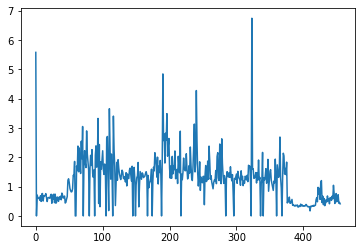

In [63]:
plt.plot(rt[0])

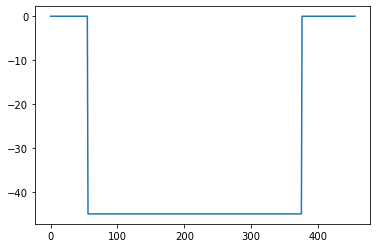

In [23]:
plt.plot(rot[1])

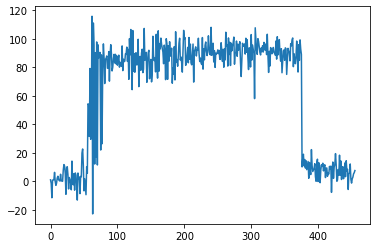

In [104]:
plt.plot(target_error[6])

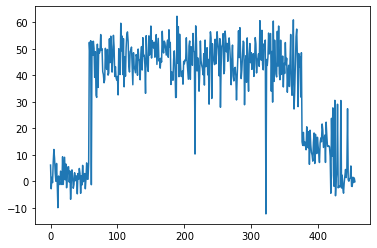

In [85]:
plt.plot(hand_angle[0])

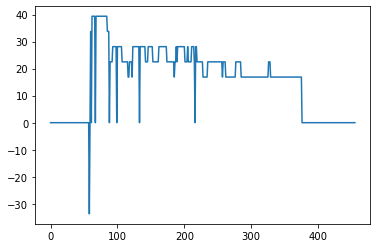

In [87]:
plt.plot(explicit[13])

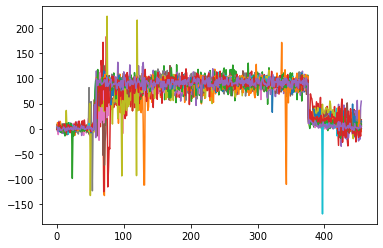

In [125]:
for i in range(15):
    plt.plot(target_error[i])

(-60.0, 45.0)

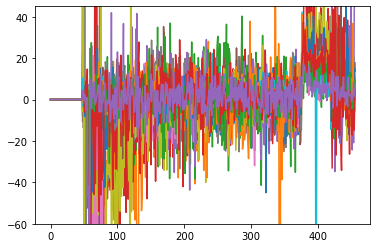

In [129]:
for i in range(15):
    plt.plot(np.nan_to_num(implicit[i])+np.nan_to_num(explicit[i])+rot[i])

plt.ylim(-60, 45)

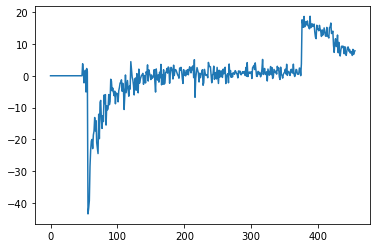

In [4]:
plt.plot(np.mean(np.nan_to_num(implicit)+np.nan_to_num(explicit)+rot, axis = 0))

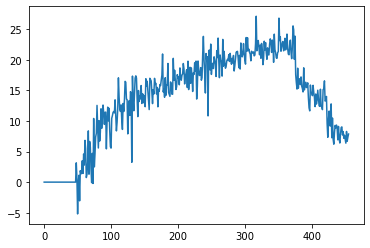

In [133]:
plt.plot(np.mean(np.nan_to_num(implicit), axis = 0))

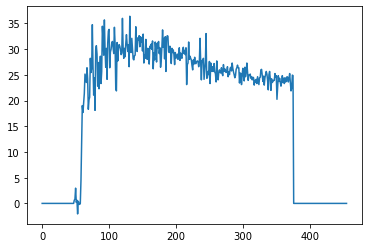

In [134]:
plt.plot(np.mean(np.nan_to_num(explicit), axis = 0))

In [257]:
error = np.nan_to_num(implicit)+np.nan_to_num(explicit)+rot

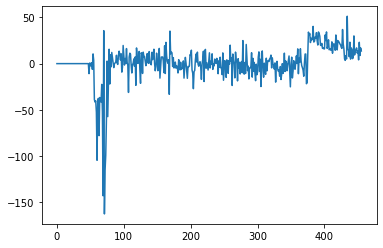

In [68]:
plt.plot(error[5])

In [530]:
error = np.nan_to_num(implicit)+np.nan_to_num(explicit)+rot
target = np.nan_to_num(explicit) / 90
error = error / 90
target = target[:,56:-80]
error = error[:,56:-80]

In [531]:
np.random.shuffle(target)
np.random.shuffle(error)
testY = target[45:]
trainY = target[:45]
testX = error[45:]
trainX = error[:45]

In [532]:
trainX.shape

(45, 320)

In [571]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras import regularizers
from tensorflow.keras import initializers

hidden = 10
#target = np.abs(target)
#error = np.abs(error)
#target = np.reshape(target, (target.shape[0], target.shape[1]))
#error = np.reshape(error, (error.shape[0], error.shape[1]))

# create and fit the LSTM network
model = Sequential()
"""
model.add(LSTM(hidden, 
    use_bias=False, 
    kernel_regularizer=regularizers.L1L2(l1=1e-3, l2=1e-2),
    kernel_initializer=initializers.RandomNormal(stddev=0.01)))
"""
model.add(Dense(64, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(target.shape[1], activation = 'tanh'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=45, verbose=2, shuffle = True)

Epoch 1/100
1/1 - 0s - loss: 0.1480 - 349ms/epoch - 349ms/step
Epoch 2/100
1/1 - 0s - loss: 0.1352 - 7ms/epoch - 7ms/step
Epoch 3/100
1/1 - 0s - loss: 0.1241 - 8ms/epoch - 8ms/step
Epoch 4/100
1/1 - 0s - loss: 0.1136 - 8ms/epoch - 8ms/step
Epoch 5/100
1/1 - 0s - loss: 0.1031 - 8ms/epoch - 8ms/step
Epoch 6/100
1/1 - 0s - loss: 0.0924 - 8ms/epoch - 8ms/step
Epoch 7/100
1/1 - 0s - loss: 0.0819 - 7ms/epoch - 7ms/step
Epoch 8/100
1/1 - 0s - loss: 0.0720 - 8ms/epoch - 8ms/step
Epoch 9/100
1/1 - 0s - loss: 0.0637 - 8ms/epoch - 8ms/step
Epoch 10/100
1/1 - 0s - loss: 0.0579 - 9ms/epoch - 9ms/step
Epoch 11/100
1/1 - 0s - loss: 0.0552 - 8ms/epoch - 8ms/step
Epoch 12/100
1/1 - 0s - loss: 0.0547 - 8ms/epoch - 8ms/step
Epoch 13/100
1/1 - 0s - loss: 0.0549 - 8ms/epoch - 8ms/step
Epoch 14/100
1/1 - 0s - loss: 0.0541 - 8ms/epoch - 8ms/step
Epoch 15/100
1/1 - 0s - loss: 0.0520 - 8ms/epoch - 8ms/step
Epoch 16/100
1/1 - 0s - loss: 0.0488 - 9ms/epoch - 9ms/step
Epoch 17/100
1/1 - 0s - loss: 0.0454 - 8ms/ep

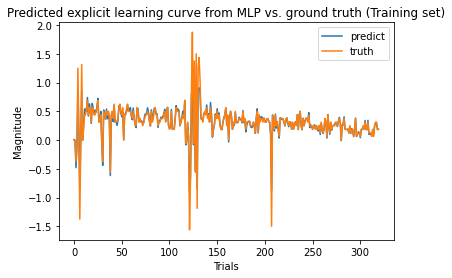

In [573]:
predict_linear = model.predict(trainX)
plt.plot(predict_linear[17], label = "predict")
plt.plot(trainY[17], label = "truth")
plt.xlabel("Trials")
plt.ylabel("Magnitude")
plt.title("Predicted explicit learning curve from MLP vs. ground truth (Training set)")
plt.legend()

In [574]:
MSE = np.sum((predict_linear - trainY)**2)/trainY.shape[0]/trainY.shape[1]
print(MSE)

0.007340986802584758


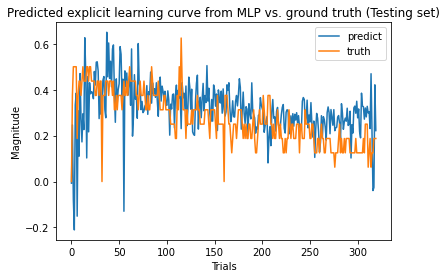

In [578]:
predict_linear = model.predict(testX)
plt.plot(predict_linear[5], label = "predict")
plt.plot(testY[4], label = "truth")
plt.xlabel("Trials")
plt.ylabel("Magnitude")
plt.title("Predicted explicit learning curve from MLP vs. ground truth (Testing set)")
plt.legend()

In [576]:
MSE = np.sum((predict_linear - testY)**2)/testY.shape[0]/testY.shape[1]
print(MSE)

0.06275444917478543


In [501]:
timestep=25
x_train=[]
y_train=[]
x_test=[]
y_test=[]
for j in range(len(trainX)):
    for i in range(timestep,trainX.shape[1]):
        x_train.append(trainX[j,i-timestep:i])
        y_train.append(trainX[j,i])
for j in range(len(testX)):
    for i in range(timestep,testX.shape[1]):
        x_test.append(testX[j,i-timestep:i])
        y_test.append(testX[j,i])

x_train,y_train=np.array(x_train),np.array(y_train)
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1) #reshaped for RNN
x_test,y_test=np.array(x_test),np.array(y_test)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1) #reshaped for RNN
print("x-train-shape= ",x_train.shape)
print("y-train-shape= ",y_train.shape)
print("x-test-shape= ",x_test.shape)
print("y-test-shape= ",y_test.shape)

x-train-shape=  (13275, 25, 1)
y-train-shape=  (13275,)
x-test-shape=  (2950, 25, 1)
y-test-shape=  (2950,)


In [502]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras import regularizers
from tensorflow.keras import initializers

# create and fit the LSTM network
reg=Sequential()
reg.add(LSTM(64,return_sequences=True, input_shape=(x_train.shape[1],1)))
reg.add(Dropout(0.15))
reg.add(LSTM(256,return_sequences=True))
reg.add(Dropout(0.25))
reg.add(Flatten())
reg.add(Dense(1, activation = 'tanh'))

reg.compile(optimizer="adam",loss="mean_squared_error")
reg.fit(x_train,y_train,epochs=50,batch_size=512)

Epoch 1/50
26/26 [==============================] - 36s 1s/step - loss: 0.1006
Epoch 2/50
26/26 [==============================] - 33s 1s/step - loss: 0.0998
Epoch 3/50
26/26 [==============================] - 33s 1s/step - loss: 0.0988
Epoch 4/50
26/26 [==============================] - 34s 1s/step - loss: 0.0985
Epoch 5/50
26/26 [==============================] - 33s 1s/step - loss: 0.0986
Epoch 6/50
26/26 [==============================] - 33s 1s/step - loss: 0.0982
Epoch 7/50
26/26 [==============================] - 33s 1s/step - loss: 0.0980
Epoch 8/50
26/26 [==============================] - 33s 1s/step - loss: 0.0979
Epoch 9/50
26/26 [==============================] - 33s 1s/step - loss: 0.0977
Epoch 10/50
26/26 [==============================] - 33s 1s/step - loss: 0.0979
Epoch 11/50
26/26 [==============================] - 33s 1s/step - loss: 0.0982
Epoch 12/50
26/26 [==============================] - 33s 1s/step - loss: 0.0979
Epoch 13/50
26/26 [==============================

In [503]:
predict = reg.predict(x_test)
predict2 = reg.predict(x_train)

In [504]:
result = []
for i in range(10):
    result.append(predict[i*(320-timestep): (i+1)*(320-timestep)])
result2 = []
for i in range(45):
    result2.append(predict2[i*(320-timestep): (i+1)*(320-timestep)])

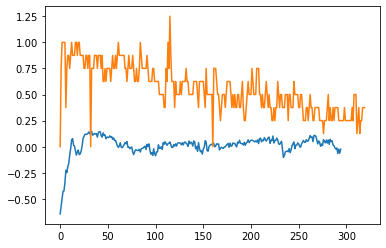

In [507]:
plt.plot(result[2])
plt.plot(testY[2])

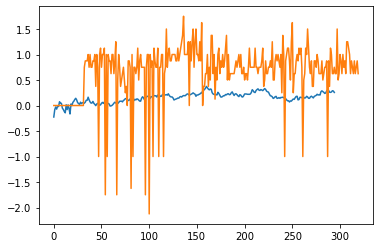

In [508]:
plt.plot(result2[3])
plt.plot(trainY[3])

# implicit

In [582]:
error = np.nan_to_num(implicit)+np.nan_to_num(explicit)+rot
target = np.nan_to_num(implicit) / 90
error = error / 90
target = target[:,56:]
error = error[:,56:]

In [583]:
np.random.shuffle(target)
np.random.shuffle(error)
testY = target[45:]
trainY = target[:45]
testX = error[45:]
trainX = error[:45]

In [584]:
trainX.shape

(45, 400)

In [585]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras import regularizers
from tensorflow.keras import initializers

hidden = 10
#target = np.abs(target)
#error = np.abs(error)
#target = np.reshape(target, (target.shape[0], target.shape[1]))
#error = np.reshape(error, (error.shape[0], error.shape[1]))

# create and fit the LSTM network
model = Sequential()
"""
model.add(LSTM(hidden, 
    use_bias=False, 
    kernel_regularizer=regularizers.L1L2(l1=1e-3, l2=1e-2),
    kernel_initializer=initializers.RandomNormal(stddev=0.01)))
"""
model.add(Dense(512, activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(target.shape[1], activation = 'tanh'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=75, batch_size=45, verbose=2, shuffle = True)

Epoch 1/75
1/1 - 0s - loss: 0.0765 - 393ms/epoch - 393ms/step
Epoch 2/75
1/1 - 0s - loss: 0.0505 - 29ms/epoch - 29ms/step
Epoch 3/75
1/1 - 0s - loss: 0.0401 - 32ms/epoch - 32ms/step
Epoch 4/75
1/1 - 0s - loss: 0.0388 - 30ms/epoch - 30ms/step
Epoch 5/75
1/1 - 0s - loss: 0.0343 - 29ms/epoch - 29ms/step
Epoch 6/75
1/1 - 0s - loss: 0.0294 - 32ms/epoch - 32ms/step
Epoch 7/75
1/1 - 0s - loss: 0.0268 - 32ms/epoch - 32ms/step
Epoch 8/75
1/1 - 0s - loss: 0.0252 - 32ms/epoch - 32ms/step
Epoch 9/75
1/1 - 0s - loss: 0.0233 - 31ms/epoch - 31ms/step
Epoch 10/75
1/1 - 0s - loss: 0.0216 - 30ms/epoch - 30ms/step
Epoch 11/75
1/1 - 0s - loss: 0.0204 - 32ms/epoch - 32ms/step
Epoch 12/75
1/1 - 0s - loss: 0.0193 - 39ms/epoch - 39ms/step
Epoch 13/75
1/1 - 0s - loss: 0.0176 - 29ms/epoch - 29ms/step
Epoch 14/75
1/1 - 0s - loss: 0.0161 - 30ms/epoch - 30ms/step
Epoch 15/75
1/1 - 0s - loss: 0.0150 - 39ms/epoch - 39ms/step
Epoch 16/75
1/1 - 0s - loss: 0.0141 - 31ms/epoch - 31ms/step
Epoch 17/75
1/1 - 0s - loss: 0.

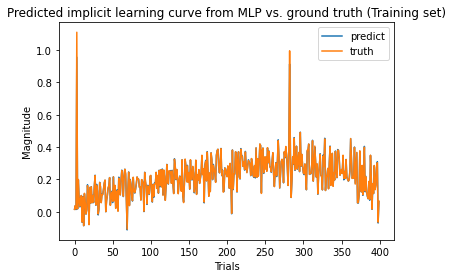

In [586]:
predict_linear = model.predict(trainX)
plt.plot(predict_linear[2], label = "predict")
plt.plot(trainY[2], label = "truth")
plt.xlabel("Trials")
plt.ylabel("Magnitude")
plt.title("Predicted implicit learning curve from MLP vs. ground truth (Training set)")
plt.legend()

In [587]:
MSE = np.sum((predict_linear - trainY)**2)/trainY.shape[0]/trainY.shape[1]
print(MSE)

0.0033278257687070784


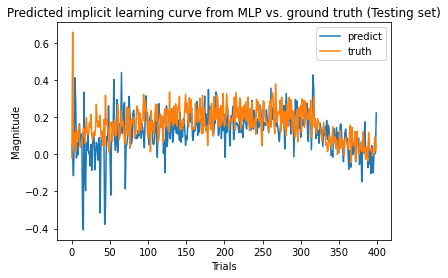

In [593]:
predict_linear = model.predict(testX)
plt.plot(predict_linear[4], label = "predict")
plt.plot(testY[4], label = "truth")
plt.xlabel("Trials")
plt.ylabel("Magnitude")
plt.title("Predicted implicit learning curve from MLP vs. ground truth (Testing set)")
plt.legend()

In [589]:
MSE = np.sum((predict_linear - testY)**2)/testY.shape[0]/testY.shape[1]
print(MSE)

0.044474979899882576


In [396]:
timestep=50
x_train=[]
y_train=[]
x_test=[]
y_test=[]
for j in range(len(trainX)):
    for i in range(timestep,trainX.shape[1]):
        x_train.append(trainX[j,i-timestep:i])
        y_train.append(trainX[j,i])
for j in range(len(testX)):
    for i in range(timestep,testX.shape[1]):
        x_test.append(testX[j,i-timestep:i])
        y_test.append(testX[j,i])

x_train,y_train=np.array(x_train),np.array(y_train)
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1) #reshaped for RNN
x_test,y_test=np.array(x_test),np.array(y_test)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1) #reshaped for RNN
print("x-train-shape= ",x_train.shape)
print("y-train-shape= ",y_train.shape)
print("x-test-shape= ",x_test.shape)
print("y-test-shape= ",y_test.shape)

x-train-shape=  (12150, 50, 1)
y-train-shape=  (12150,)
x-test-shape=  (2700, 50, 1)
y-test-shape=  (2700,)


In [ ]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras import regularizers
from tensorflow.keras import initializers

# create and fit the LSTM network
reg=Sequential()
reg.add(LSTM(256,return_sequences=True, input_shape=(x_train.shape[1],1)))
reg.add(Dropout(0.15))
reg.add(LSTM(512,return_sequences=True))
reg.add(Dropout(0.15))
reg.add(Flatten())
reg.add(Dense(1))

reg.compile(optimizer="adam",loss="mean_squared_error")
reg.fit(x_train,y_train,epochs=10,batch_size=256)

Epoch 1/10
24/48 [==============>...............] - ETA: 2:45 - loss: 0.0848

In [406]:
predict = reg.predict(x_test)
predict2 = reg.predict(x_train)

In [407]:
result = []
for i in range(10):
    result.append(predict[i*(320-timestep): (i+1)*(320-timestep)])
result2 = []
for i in range(45):
    result2.append(predict2[i*(320-timestep): (i+1)*(320-timestep)])

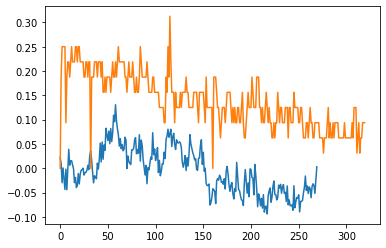

In [408]:
plt.plot(result[1])
plt.plot(testY[1])

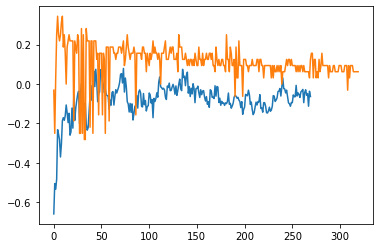

In [409]:
plt.plot(result2[10])
plt.plot(trainY[10])

In [251]:
testY.shape

(10, 240)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

model = nn.RNN(10, 20, 2)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
## Choose the appropriate loss function
loss_fn = torch.nn.MSELoss()
## Cache for Loss Values
losses = []
## Training Loop
for epoch in range(100):
    total_loss = .0
    model.train()
    for batch, (context, target) in enumerate(get_cbow_batches(train_data, batch_size)):
        if gpu_avail:
            context = context.cuda()
            target = target.cuda()
        predict = model(context)
        loss = loss_fn(predict, torch.flatten(target))
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        if print_every is not None and (batch + 1) % print_every == 0:
            print("Epoch {} || batch {} || Loss: {:.4f}".format(epoch+1, batch+1, total_loss / (batch+1)))

    model.eval()
    ## Compute Loss on Test and Training Data
    train_loss = total_loss / (batch+1) 
    test_loss = .0
    for batch, (context, target) in enumerate(get_cbow_batches(test_data, batch_size)):
        if gpu_avail:
            context = context.cuda()
            target = target.cuda()
        predict = model(context)

        loss = loss_fn(predict, torch.flatten(target))
        test_loss += loss.item()
    test_loss = test_loss / (batch+1)
    print("Epoch {}/{} || Train Loss: {:.4f} || Test Loss: {:.4f}".format(epoch+1, n_epoch, train_loss, test_loss))
    losses.append(train_loss)
    test_losses.append(test_loss)
print("Training Complete.")
return model, losses, test_losses

In [36]:
from os.path import dirname, join as pjoin
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

mat = sio.loadmat("OnlineNoReportData.mat")

In [2]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Wed May 29 10:48:40 2013',
 '__version__': '1.0',
 '__globals__': [],
 'data': array([[(array([[[  12.66648698,   12.68140602,   12.69797301, ...,
                            nan,           nan,           nan],
                 [  25.53014398,   25.54754901,   25.5647881 , ...,
                            nan,           nan,           nan],
                 [  33.76314116,   33.78072596,   33.79659605, ...,
                            nan,           nan,           nan],
                 ...,
                 [1155.83608484, 1155.85328984, 1155.86920381, ...,
                            nan,           nan,           nan],
                 [1160.55282187, 1160.56951785, 1160.58592296, ...,
                            nan,           nan,           nan],
                 [1165.3871839 , 1165.40206385, 1165.41967583, ...,
                            nan,           nan,           nan]],
 
                [[  24.1583848 ,   2

In [136]:
x = mat["data"]["cursor_x"][0][0]
y = mat["data"]["cursor_y"][0][0]
target_dist = mat["data"]["target_dist"][0][0]
target_angle = mat["data"]["target_angle"][0][0]
hand_angle = mat["data"]["hand_angle"][0][0]
rotation = mat["data"]["rotation"][0][0]
hand_r = mat["data"]["hand_r"][0][0]
hand_x = mat["data"]["hand_x"][0][0]
hand_y = mat["data"]["hand_y"][0][0]
target_x = mat["data"]["target_x"][0][0]
target_y = mat["data"]["target_y"][0][0]

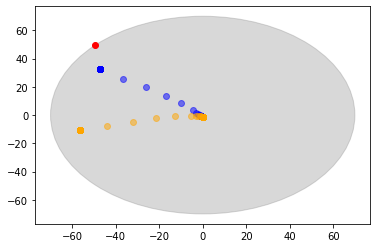

In [152]:
circle1 = plt.Circle((0, 0),70, color='gray', alpha = 0.3)
plt.gca().add_patch(circle1)
plt.scatter(x[1,60,:],y[1,60,:],color="blue",alpha = 0.5)
plt.scatter(hand_x[1,60,:],hand_y[1,60,:],color = "orange",alpha = 0.5)
plt.scatter(target_x[1,60],target_y[1,60],color = "red",alpha = 1)

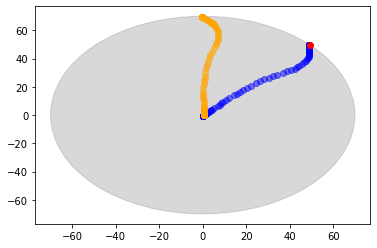

In [150]:
circle1 = plt.Circle((0, 0),70, color='gray', alpha = 0.3)
plt.gca().add_patch(circle1)
plt.scatter(x[1,90,:],y[1,90,:],color="blue",alpha = 0.5)
plt.scatter(hand_x[1,90,:],hand_y[1,90,:],color = "orange",alpha = 0.5)
plt.scatter(target_x[1,90],target_y[1,90],color = "red",alpha = 1)

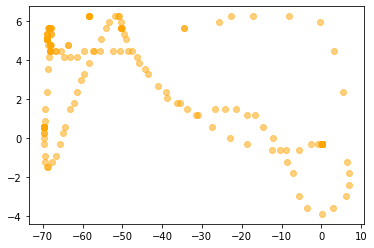

In [146]:
plt.scatter(hand_x[1,100,:],hand_y[1,100,:],color = "orange",alpha = 0.5)

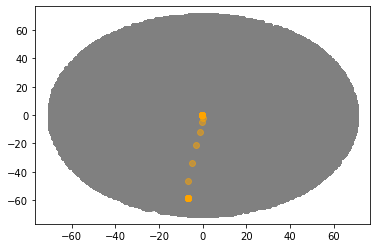

In [50]:
plt.scatter(x[:,:,:],y[:,:,:],color="gray",alpha = 0.5)
plt.scatter(hand_x[1,1,:],hand_y[1,1,:],color = "orange",alpha = 0.5)

In [48]:
hand_x[1,1]

array([-0.297657, -0.297657, -0.297657, -0.297657, -0.297657, -0.297657,
       -0.297657, -0.297657, -0.297657, -0.297657, -0.297657, -0.297657,
       -0.297657, -0.297657, -0.297657, -0.297657, -0.297657, -0.297657,
       -0.297657, -0.297657, -0.297657, -0.297657, -0.297657, -0.297657,
       -0.297657, -0.297657, -0.297657, -0.297657, -0.297657, -0.297657,
        0.      , -0.297657, -1.190628, -2.97657 , -5.060169, -6.548454,
       -6.548454, -6.548454, -6.548454, -6.548454, -6.548454, -6.548454,
       -6.548454, -6.548454, -6.548454, -6.548454, -6.548454, -6.548454,
       -6.548454, -6.548454, -6.548454, -6.548454, -6.548454, -6.548454,
       -6.548454, -6.548454, -6.548454, -6.548454, -6.548454, -6.548454,
       -6.548454, -6.548454, -6.548454, -6.548454, -6.548454, -6.548454,
       -6.548454, -6.548454, -6.548454, -6.548454, -6.548454, -6.548454,
       -6.548454, -6.548454, -6.548454, -6.548454, -6.548454, -6.548454,
       -6.548454, -6.548454, -6.548454, -6.548454, 

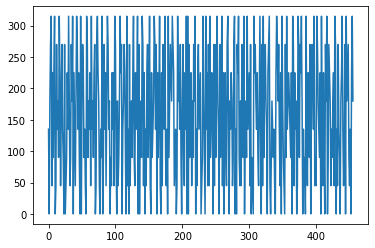

In [39]:
plt.plot(target_angle[0])

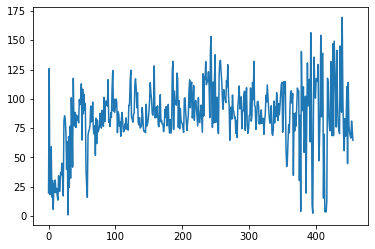

In [44]:
plt.plot(hand_r[0])

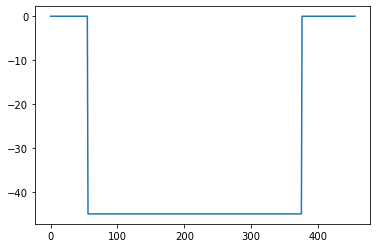

In [42]:
plt.plot(rotation[0])

In [53]:
hand_angle.shape

(15, 456)